# Walmart Prediction

# Import required Lib

In [21]:
import pandas as pd                                        
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import warnings
import sklearn.metrics as metrics                      
%matplotlib inline

In [22]:
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

# Load Dataset 


In [4]:
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")
train_df = pd.read_csv("train.csv")

# Stores :
Store: The store number. Range from 1–45.

Type: Three types of stores ‘A’, ‘B’ or ‘C’.

Size: Sets the size of a Store would be calculated by the no. of products available in the particular store ranging from 34,000 to 210,000.


# Features:
Temperature: Temperature of the region during that week.

Fuel_Price: Fuel Price in that region during that week

MarkDown1:5 : Represents the Type of markdown and what quantity was available during that week.

CPI: Consumer Price Index during that week.

Unemployment: The unemployment rate during that week in the region of the store.

# Train:
Date: The date of the week where this observation was taken.

Weekly_Sales: The sales recorded during that Week.

Dept: One of 1–99 that shows the department.

IsHoliday: a Boolean value representing a holiday week or not.


In [5]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [9]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [10]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [11]:
# Creating a custom season dictionary to identify the season in each month
seasons_dict = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}

In [12]:
# Creating the master dataset
master_df = train_df.merge(stores_df, on='Store', how='left')
master_df = master_df.merge(features_df, on=['Store', 'Date'], how='left')

In [13]:
master_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [14]:
master_df.shape


(421570, 17)

In [15]:
# Cleaning holiday columns
master_df['isHoliday'] = master_df['IsHoliday_x']
master_df = master_df.drop(columns=['IsHoliday_x', 'IsHoliday_y'])

In [16]:
master_df.shape

(421570, 16)

In [17]:
master_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [37]:
master_df.shape

(421570, 16)

In [19]:
master_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [20]:
master_df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


# Determine Numeric and Categorical variables

In [26]:
numeric_var = [key for key in dict(master_df.dtypes) if dict(master_df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var = [key for key in dict(master_df.dtypes) if dict(master_df.dtypes)[key] in ['object']]

#Numerical Data
train_num=master_df[numeric_var]

#Categorical Data
train_cat=master_df[cat_var]

In [29]:
#print (numeric_var)
print (cat_var)

['Date', 'Type']


# Import LabelEncoder to replace strings from categorical variables to numeric values.

In [30]:
from sklearn.preprocessing import LabelEncoder

In [32]:
lb_enc = LabelEncoder()
master_df['Type_code'] = lb_enc.fit_transform(master_df['Type'])


In [38]:
#master_df.head()

In [39]:
master_df.drop(['Type'],axis = 1, inplace = True) # droping categorical values

In [40]:
master_df.head()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday,Type_code
0,1,1,2010-02-05,24924.50,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,0
1,1,1,2010-02-12,46039.49,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,0
2,1,1,2010-02-19,41595.55,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,0
3,1,1,2010-02-26,19403.54,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,0
4,1,1,2010-03-05,21827.90,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,0


In [41]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
isHoliday       421570 non-null bool
Type_code       421570 non-null int32
dtypes: bool(1), float64(10), int32(1), int64(3), object(1)
memory usage: 50.3+ MB


# Converting Date field to Datetime so that we can easily extract week no, day, date and year from date and make them as new columns

In [44]:
master_df['Date'] = pd.to_datetime(master_df['Date'])

In [46]:
# Extract date features
master_df['Date_dayofweek'] =master_df['Date'].dt.dayofweek
master_df['Date_month'] =master_df['Date'].dt.month 
master_df['Date_year'] =master_df['Date'].dt.year
master_df['Date_day'] =master_df['Date'].dt.day

# checking for missing values

In [48]:
master_df.isnull().sum()

Store                  0
Dept                   0
Date                   0
Weekly_Sales           0
Size                   0
Temperature            0
Fuel_Price             0
MarkDown1         270889
MarkDown2         310322
MarkDown3         284479
MarkDown4         286603
MarkDown5         270138
CPI                    0
Unemployment           0
isHoliday              0
Type_code              0
Date_dayofweek         0
Date_month             0
Date_year              0
Date_day               0
dtype: int64

In [50]:
master_df.fillna(0,inplace = True) #filling all null markdown as 0

In [51]:
master_df.isnull().sum()

Store             0
Dept              0
Date              0
Weekly_Sales      0
Size              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI               0
Unemployment      0
isHoliday         0
Type_code         0
Date_dayofweek    0
Date_month        0
Date_year         0
Date_day          0
dtype: int64

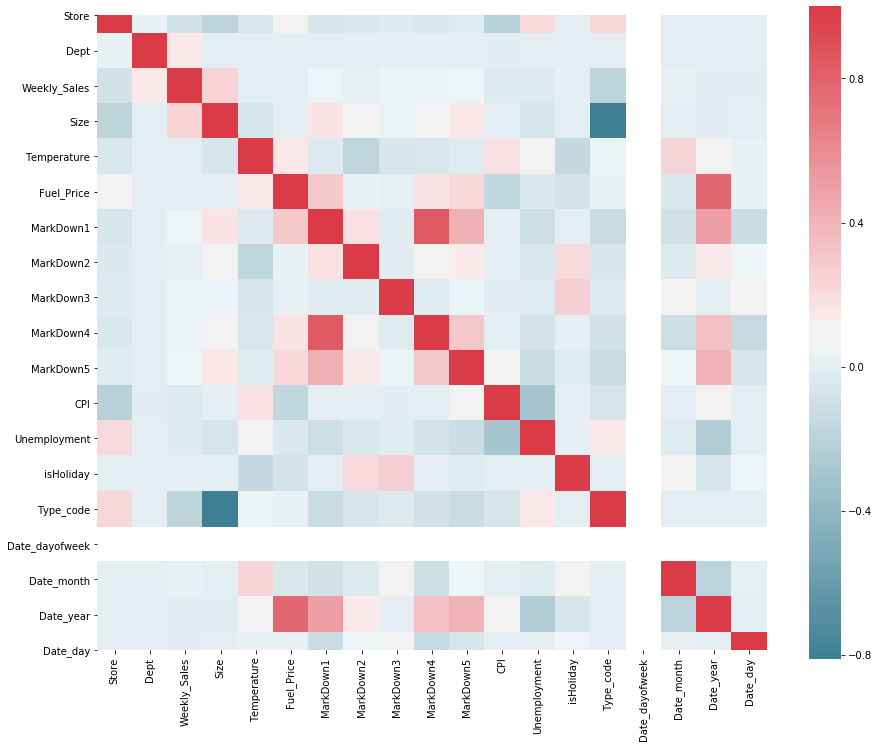

In [52]:
#visualize the correlation matrix
f, ax = plt.subplots(figsize=(15, 12))
corr = master_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

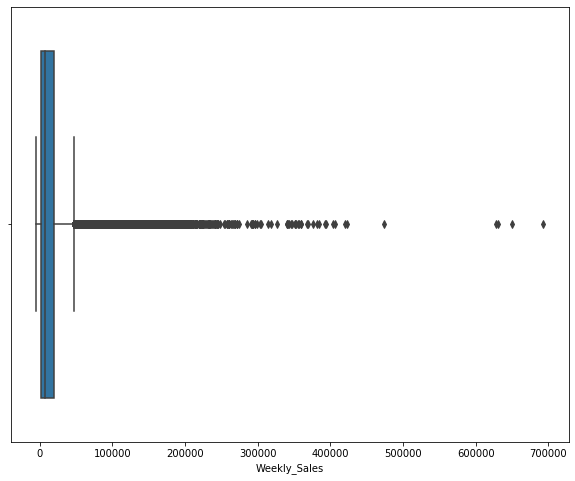

In [53]:
#Outlier Analysis

f,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=master_df['Weekly_Sales'],ax=ax)

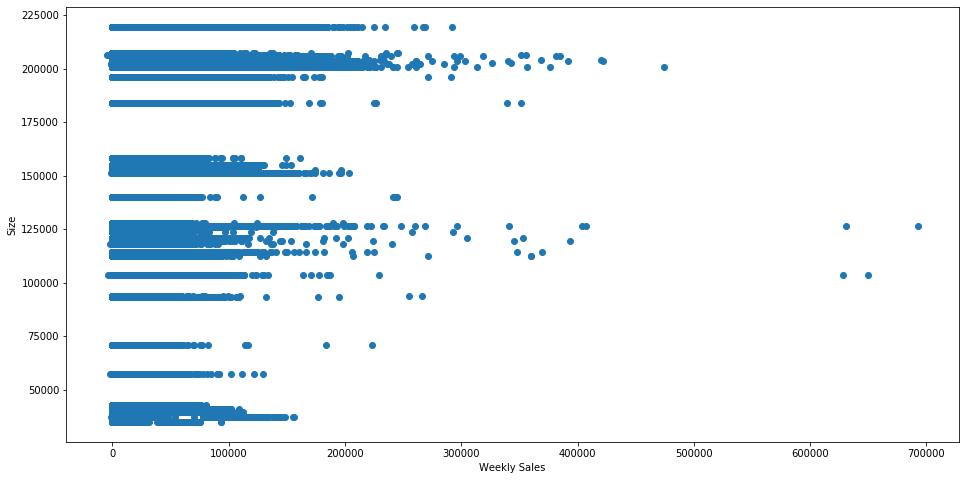

In [54]:

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(master_df['Weekly_Sales'], master_df['Size'])
ax.set_xlabel('Weekly Sales')
ax.set_ylabel('Size')
plt.show()

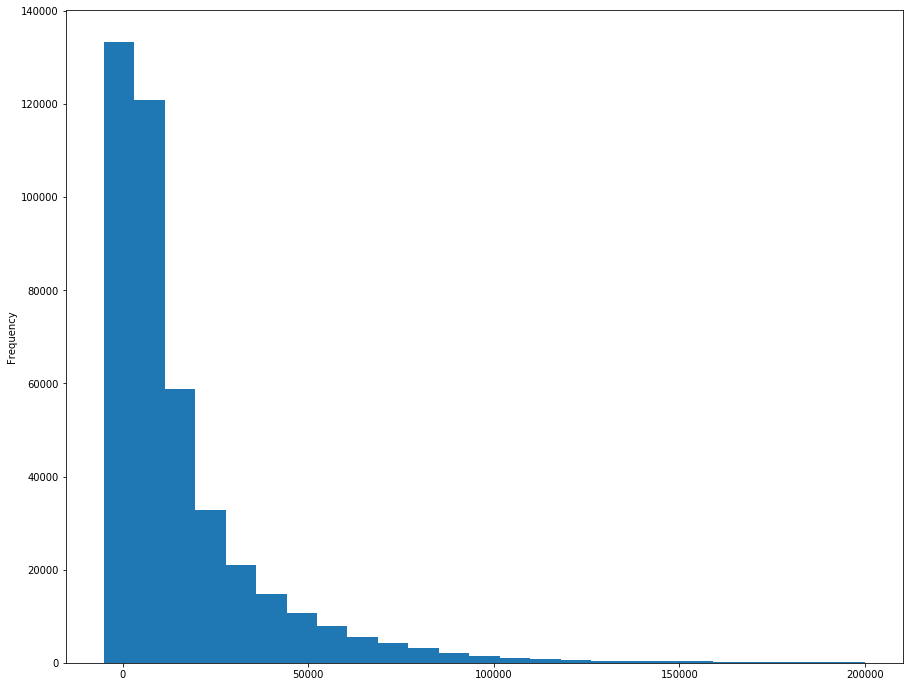

In [56]:
# from above box plot and scatter plot, weekly sale greater than 200000 considered as outlier hence setting it to 100000

master_df.Weekly_Sales=np.where(master_df.Weekly_Sales>200000, 200000,master_df.Weekly_Sales)

f,ax = plt.subplots(figsize=(15, 12))
master_df.Weekly_Sales.plot.hist(bins=25,ax=ax)

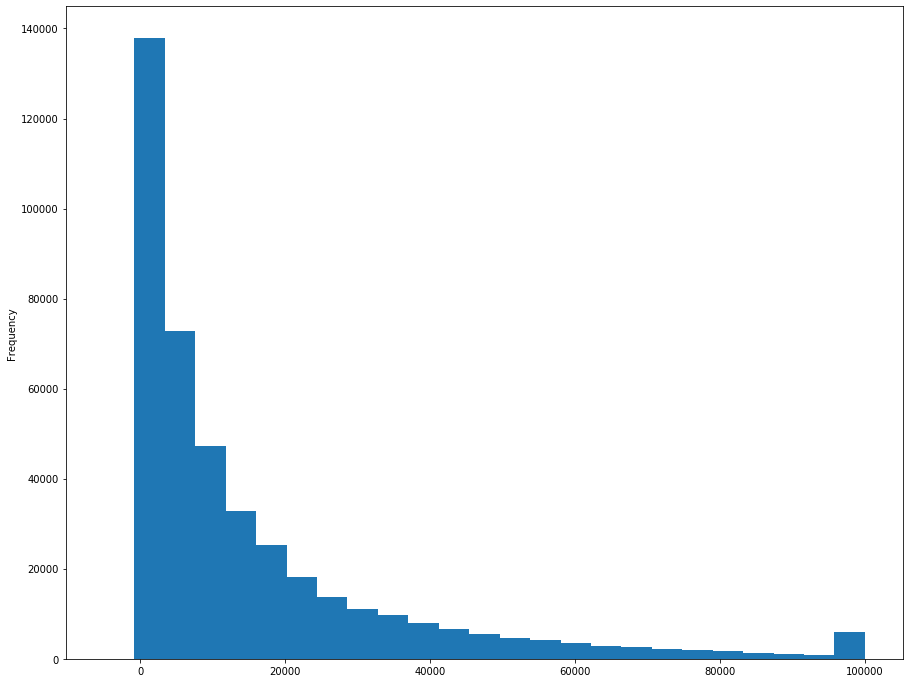

In [57]:
#again from above graph we can make all sales greater than 100000 equal to 100000 by treating them as outliers

master_df.Weekly_Sales=np.where(master_df.Weekly_Sales>100000, 100000,master_df.Weekly_Sales)

f,ax = plt.subplots(figsize=(15, 12))
master_df.Weekly_Sales.plot.hist(bins=25,ax=ax)

In [58]:
master_df.head()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday,Type_code,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0,4,2,2010,5
1,1,1,2010-02-12,46039.49,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0,4,2,2010,12
2,1,1,2010-02-19,41595.55,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0,4,2,2010,19
3,1,1,2010-02-26,19403.54,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0,4,2,2010,26
4,1,1,2010-03-05,21827.90,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0,4,3,2010,5


In [59]:

type_mapping = {False: 0, True: 1}
master_df['isHoliday'] = master_df['isHoliday'].map(type_mapping)

In [60]:
master_df.head()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday,Type_code,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,4,2,2010,5
1,1,1,2010-02-12,46039.49,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,0,4,2,2010,12
2,1,1,2010-02-19,41595.55,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,0,4,2,2010,19
3,1,1,2010-02-26,19403.54,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,0,4,2,2010,26
4,1,1,2010-03-05,21827.90,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,0,4,3,2010,5


In [62]:
master_df.drop(['Date'], axis=1,inplace = True)

In [63]:
master_df.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isHoliday,Type_code,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,24924.50,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,4,2,2010,5
1,1,1,46039.49,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,0,4,2,2010,12
2,1,1,41595.55,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,0,4,2,2010,19
3,1,1,19403.54,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,0,4,2,2010,26
4,1,1,21827.90,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,0,4,3,2010,5


# Model Buliding

In [65]:

X=master_df.drop(['Weekly_Sales'], axis=1)

y=master_df['Weekly_Sales']

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_linear=mlr.predict(X_test)
acc_linear= mlr.score(X_train, y_train)
print (acc_linear)

0.08972650140695326


In [69]:
mlr.score(X_train, y_train) * 100

8.972650140695325

In [70]:
mlr.score(X_train, y_train) #r square

0.08972650140695326

In [71]:
mlr.score(X_test, y_test)

0.09029467768525512

In [72]:

from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
mse = mean_squared_error(y_test, y_pred_linear)
r_squared = r2_score(y_test, y_pred_linear)
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 384038201.56615376
Root_Mean_Squared_Error : 19596.892650778944
r_square_value : 0.09029467768525512


# Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
acc_rf = rf.score(X_train, y_train)

print (acc_rf*100)

99.72996896631436


# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt . fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt= dt.score(X_train, y_train)

print(acc_dt*100)

100.0


In [76]:
#Model Comparision

models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_linear*100, acc_rf*100,acc_dt*100]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,100.000000
1,Random Forest,99.729969
0,Linear Regression,8.972650
